# 填充与步幅

## 填充

所有侧填充一个像素

In [1]:
import torch as tor
from torch import nn as tor_nn

In [2]:
def comp_conv2d(conv2d, X):
    X = X.reshape((1, 1) + X.shape)
    # 注意，这里的意思是直接加入通道数和批量大小数，也就是直接的加两维
    Y = conv2d(X)
    return Y.reshape(Y.shape[2:]) # 注意这里的2：是指从shape[2]之后的状态，其中0，1分别是epoch轮次数与通道数，所以shape[2]之后就是真正的图片大小信息了


In [3]:
conv2d = tor_nn.Conv2d(1, 1, kernel_size=3, padding= 1) # 这里padding代表填充是上下左右各填充一行
#                                       3x3
X = tor.rand(size=(8,8))
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [4]:
conv2d = tor_nn.Conv2d(1, 1, kernel_size=(5, 3), padding=(2,1))
#                                         5x3       (5-1)/2 (3-1)/2
comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [5]:
conv2d = tor_nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

注意，下面这个修改是对比于上两行的程序

In [6]:
conv2d = tor_nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

这个是由于我们添加了一个stride = 2这个参数，这个参数的意思其实就是我们的行和列都作为一个2的跨度，而正好我们的数据其实是8 x 8的，那么我们做了一个2的步幅直接行列/2变为了4 x 4

下面是一个稍微复杂的例子：我们对于行列的padding和stride都及逆行操作

In [7]:
conv2d = tor_nn.Conv2d(1, 1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))
comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

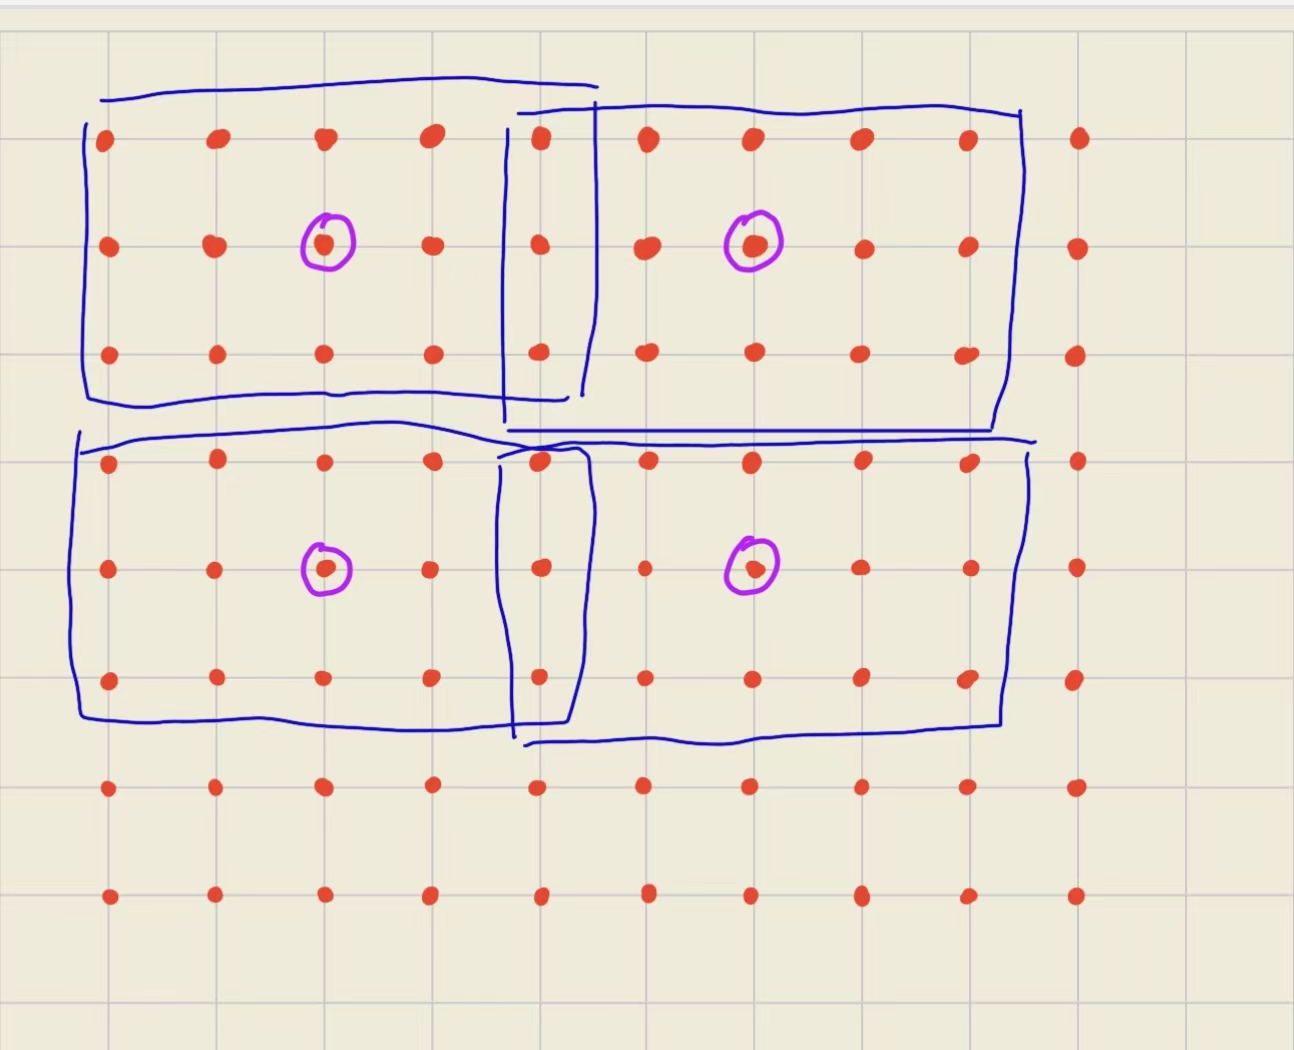

这就是我们的数据的操作